This notebook builds on the `2020-07-06 Single neuron sim` notebook.

There, we used an ad-hoc solution to stimulate the simulated neuron  
(namely, directly give I as input, where I is a spike train convolved with a manually
defined EPSC).

Here, we use proper synaptic conductances.


In [1]:
import sys
sys.path.append('../code')

%reload_ext autoreload
%autoreload 2

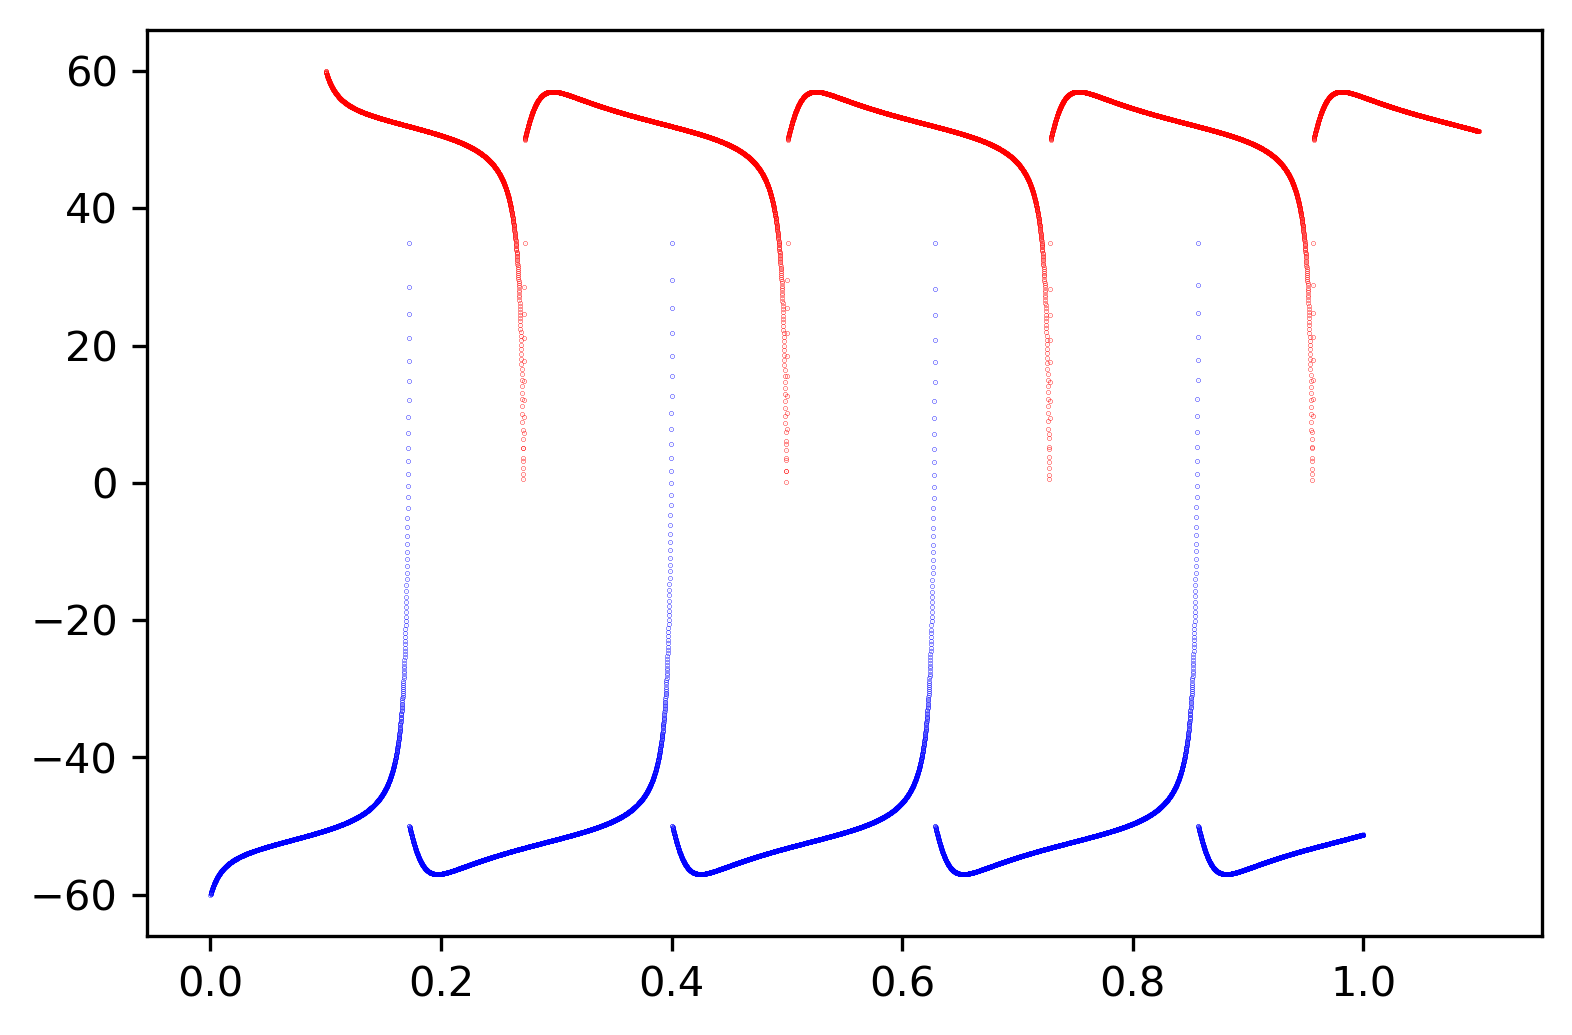

In [2]:
import neuron_sim
neuron_sim.test()

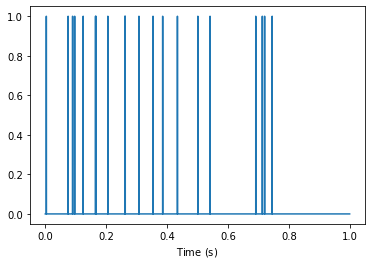

In [10]:
import presynaptic_spike_train
presynaptic_spike_train.show()